# Scikit-Learn Linear Regression

### This implementation uses Scikit-Learn to build a linear regression model

## Goal: Predict used car prices and compare with No-Framework implementation

What Scikit-Learn provides (what we built manually in No-Framework):
- `train_test_split()`: Replaces our manual `train_test_split()` function
- `StandardScaler`: Replaces our manual `compute_scaling_params()` and `scale_features()` functions
- `LinearRegression`: Replaces our manual `foward()`, `compute_cost()`, `compute_gradients()`, and `train()` functions
- `mean_squared_error`, `r2_score`: Replaces our manual metric functions

Key Differerence: Scikit-Learn uses the **Normal Equation** (closed-form solution) instead of gradient descent. This means:
- No learning rate to tune
- No iterations to set
- Instant optimal solution (for datasets that fit in memory)



# Imports

In [1]:
# pandas: Data manipulation library for loading CSV files into dataframes
# We use pandas instead of numpy.genfromtxt() for easier column access
import pandas as pd

# numpy: Numerical operations library
# Still needed for array operations and setting random seed
import numpy as np

# matplotlib.pyplot: Plotting library for creating visualizations
import matplotlib.pyplot as plt

# os: Operating system interface for file path handling
import os

# Scikit-Learn Imports

# train_test_split: Splits array into random train and test subsets
from sklearn.model_selection import train_test_split

# StandardScaler: Standardizes features using z-score normalization
from sklearn.preprocessing import StandardScaler

# LinearRegression: Ordinary leas squares Linear Regression
# KEY DIFFERENCES: Uses normal Equation instead of gradient descent
from sklearn.linear_model import LinearRegression

# mean_squared_error: Calculates MSE between predictions and actual values
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducabiility (matches our project-wide seed)
RANDOM_SEED = 113
np.random.seed(RANDOM_SEED)

print("All imports successful!")
print(f"Random seed set to: {RANDOM_SEED}")

All imports successful!
Random seed set to: 113


# Load cleaned data

- Load the same pre-processed dataset used in NF implementation
- This ensures a fair comparison between frameworks
- Using pandas instead of numpy.genfromtxt() for easier column handling

In [2]:
# Define path to our cleaned dataset
DATA_PATH = os.path.join('..', '..', 'data', 'processed', 'vehicles_clean.csv')

# pd.read_csv() reads a csv file into a pandas dataframe
# Unlike numpy.genfromtxt(), pandas:
# - Automatically detects and preserves column headers
# - Infers data types for each column
# - Provides easy column access via df['column_name']
# - Handles missing values gracefully
df = pd.read_csv(DATA_PATH)

# df.sahpe returns (rows, columns) as a tuple
print(f"Dataset shape: {df.shape}")

# df.column.tolist() converts column names to a python list
print(f"Columns: {df.columns.tolist()}")

# df.head(n) returns the first n rows as a DataFrame
# Useful for quick visual verification that data loaded correctly
print(f"\nFirst 3 rows:")
print(df.head(3))

Dataset shape: (100000, 12)
Columns: ['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'state']

First 3 rows:
   price    year  manufacturer  condition  cylinders  fuel  odometer  \
0  29990  2014.0             7          2          6     2   26129.0   
1   6995  2006.0            12          0          6     2  198947.0   
2   4995  2009.0            35          6          8     2  152794.0   

   title_status  transmission  drive  type  state  
0             0             2      0     8     17  
1             6             0      3    10      5  
2             0             0      3    11     22  


# Seperate Features and Target

- price (column 0) is our TARGET - what we want to predict
- All other columns (1-11) are FEATURES - inputs to our model
- Using pandas column selection instead of numpy array slicing

In [3]:
# Define which column is our target variable
TARGET_COLUMN = 'price'

# Define feature column names
FEATURE_COLUMNS = [ 'year', 'manufacturer', 'condition', 'cylinders',
                    'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'state']

# Extract target variable (y) using pandas column selection
# df[column_name] returns a pandas Series (1D array with labels)
# .values converst it to a numpy array (matches NF format)
y = df[TARGET_COLUMN].values

# Extract features (X) using pandas column select
X = df[FEATURE_COLUMNS].values

# Verify shapes match No-Framework
# X should be (100000, 11)
# y should be (100000,)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Store feature names for later use (displaying learned weights)
FEATURE_NAMES = FEATURE_COLUMNS
print(f"\nFeature Names: {FEATURE_COLUMNS}")

Features (X) shape: (100000, 11)
Target (y) shape: (100000,)

Feature Names: ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'state']


# Train/Test Split

- Split data into training (80%) and testing (20%) sets
- Using sklearn's train_test_split() instead of our manual function
- Same random_state=113 ensures identical split to No-Framework

In [4]:
# train_test_split() splits arrays into random train and test subsets

# NO-FRAMEWORK COMPARISON
# I manually wrote 15+ lines to:
# - 1. Shuffle indices with np.random.shuffle()
# - 2. Calculate split index
# - 3. Slice arrays by indices
# Scikit-learn does this in ONE line with optimized C code

# Parameters:
# - X : Feature matrix to split
# - y : Target array to split
# - test_size : Fraction for testing (0.2 = 20%)
# - random_state : Seed for reproducibility (Important for fair comparison)
# - shuffle = Whether to shuffle before splitting (default True)

# Returns: X_train, X_test, y_train, y_test (in that order)
X_train, X_test, y_train, y_test = train_test_split(
    X,                          # Features to split
    y,                          # Target to split
    test_size=0.2,              # 20% for testing, 80% for training
    random_state=RANDOM_SEED    # Seed 113 for reporoducibility
)

# Verify split size match No-Framework
# Training: 80k Samples
# Testin: 20k Samples

print(f"Training set size: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set size: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Training set size: 80,000 samples (80%)
Test set size: 20,000 samples (20%)

X_train shape: (80000, 11)
X_test shape: (20000, 11)
y_train shape: (80000,)
y_test shape: (20000,)


# Feature Scaling (Z-Score Normalization)

- Standardize features to have mean=0 and std=1
- Using sklearn's StandardScaler instead of our manual function
- CRITICAL: Fit on training data only, then transofm both train and test (similar to NF)
- This prevents data leakage (test data statistics leaking into training)

In [5]:
# StandardScaler performs z-score normalization: z = (x - mean) / std

# NO-FRAMEWORK COMPARISON:
# I manually wrote two functions:
# 1. compute_scaling_params(): Calculate mean and std from training data
# 2. scale_features(): Apply (x - mean) / std transofrmation
# StandardScaler combines these with fit() and transofmr() methods

# CRITICAL BEST PRACTICE:
# - fit(): Only call on TRAINING DATA
# - transform(): Apply to BOTH train and test (uses learned parameters)
# - NEVER fit on test data - this causes data leakage

# Create a StandardScaler instance
scaler = StandardScaler()

# fit_transform() combines fit() and transform() in one step
X_train_scaled = scaler.fit_transform(X_train)

# transform() applies the SAME scaling (using mean/std from training)
# This ensures test data is scaled consistently with training data
# NEVER use fit_transoform() on test data - it would calculate new mean/std
X_test_scaled = scaler.transform(X_test)

# Display the learned scaling parameters
print("Scaling parameters (computed from training data):\n")
print(f"{'Feature':<15} {'Mean':>15} {'Std':>15}")
print("-" * 47)
for i, name in enumerate(FEATURE_NAMES):
    print(f"{name:<15} {scaler.mean_[i]:>15.2f} {scaler.scale_[i]:>15.2f}")

# Verify scaling worked - training data should have mean=0 and std=1
print("\n--- Verification (Training Data After Scaling) ---")
print(f"Mean of each feature (should be 0): {np.mean(X_train_scaled, axis=0).round(6)}")
print(f"Std of each feature (should be 1): {np.std(X_train_scaled, axis=0).round(6)}")

Scaling parameters (computed from training data):

Feature                    Mean             Std
-----------------------------------------------
year                    2012.32            5.79
manufacturer              18.24           11.48
condition                  3.09            2.43
cylinders                  6.00            1.92
fuel                       2.05            0.78
odometer               94235.84        62977.76
title_status               0.23            1.06
transmission               0.39            0.77
drive                      1.40            1.21
type                       7.14            4.12
state                     23.60           15.10

--- Verification (Training Data After Scaling) ---
Mean of each feature (should be 0): [ 0.  0.  0. -0.  0. -0. -0.  0.  0. -0. -0.]
Std of each feature (should be 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Train the Model

- Using sklearn's LinearRegression instead of our manual gradient descent
- KEY DIFFERENCES: Sklearn uses the Normal equation (closed-form solution)
- This calculates the optimal weights in ONE step (no iterations needed)

In [6]:
# LinearREgression uses the Normal Equation to find optimal weights

# NO-FRAMEWORK COMPARISON:
# I manually wrote:
# - forward(): Calculate predictions
# - compute_cost(): Calculate MSE
# - compute_gradients(): Calculate dW and db
# - train(): Loop through 1000 iterations updating weights
# Sklearn does all this in one method call using linear algebra

# Create a LinearRegression model instance
# fit_intercept=True (default) means it will learn a bias term
# This matches the No-framework implementation where we learned weights and bias
model = LinearRegression(fit_intercept=True)

# fit() trains the model by finding optimal weights
# Sklearn does this by:
# 1. Adds a column of 1s to X for the intercept (bias)
# 2. Solves the normal equation using optimized linear algebra
# 3. Stores results in model.coef_ (weights) and model.intercept_ (bias)
model.fit(X_train_scaled, y_train)

# Display the learned parameters
# model.intercept_ is the bias term (single scalar)
# NO-FRAMEWORK COMPARISON: This is equivalent to the learned 'bias' variable
print(f"Learned bias (intercept): $ {model.intercept_:,.2f}")

# model.coef_ contains the weights (one per feature)
# NO-FRAMEWORK COMPARISON: This is equivalent to the learned 'weights' array
print("\nLearned weights (coefficients):")
for i, name in enumerate(FEATURE_NAMES):
    print(f"    {name:<15}: {model.coef_[i]:>10.2f}")

Learned bias (intercept): $ 19,208.98

Learned weights (coefficients):
    year           :    5226.18
    manufacturer   :    -586.24
    condition      :     679.35
    cylinders      :    2429.28
    fuel           :   -2696.31
    odometer       :   -4391.57
    title_status   :    -710.06
    transmission   :    1351.93
    drive          :   -2181.78
    type           :      67.64
    state          :       2.57


# Evaluation Metrics

- Evaluate model performance on both training and test sets
- Using sklearn's mean_squared_error and r2_score instead of our manual functions
- Same metrics as No-Framework: MSE, RMSE, R^2

In [7]:
# Make predictions on training data
# model.predict() computes: X @ weights + bias
y_train_pred = model.predict(X_train_scaled)

# Make predictions on test data
y_test_pred = model.predict(X_test_scaled)

# TRAIN SET METRICS
train_mse = mean_squared_error(y_train, y_train_pred)

# To get RMSE, I will use what we did in No-Framework
train_rmse = np.sqrt(train_mse)

# r2_score() calcualtes r^2
train_r2 = r2_score(y_train, y_train_pred)

# TEST SET METRICS

# Same calculations for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Display results in same format as No-framework
print("=" * 50)
print("MODEL EVALUATION")
print("=" * 50)

print("\n--- Training Set Performance ---")
print(f"MSE:    {train_mse:,.2f}")
print(f"RMSE:   ${train_rmse:,.2f}")
print(f"R^2:    {train_r2:.4f}")

print("\n--- Test Set Performance ---")
print(f"MSE:    {test_mse:,.2F}")
print(f"RMSE:   ${test_rmse:,.2f}")
print(f"R^2:    {test_r2:.4f}")

# Interpretation
print("\n --- Interpretation ---")
print(f"On average, predictions are off by ${test_rmse:,.0f}")
print(f"The model explains {test_r2*100:.1f}% of the variance in car prices")

# Check for overfitting (gap between train and test performance)
r2_gap = train_r2 - test_r2
if r2_gap > 0.05:
    print(f"WARNING: Potential overfitting (R^2 gap: {r2_gap:.3f})")
else:
    print(f"Good generalization (R^2 gap: {r2_gap:.3f})")

MODEL EVALUATION

--- Training Set Performance ---
MSE:    101,652,942.00
RMSE:   $10,082.31
R^2:    0.4933

--- Test Set Performance ---
MSE:    102,115,067.30
RMSE:   $10,105.20
R^2:    0.4986

 --- Interpretation ---
On average, predictions are off by $10,105
The model explains 49.9% of the variance in car prices
Good generalization (R^2 gap: -0.005)


# Visualization 1: Predicted vs Actual Prices

- Scatter plot showing prediction quality on test set
- Perfect predictions would call on the diagnoal line (y = x)
- Spread around the line indicates prediction error

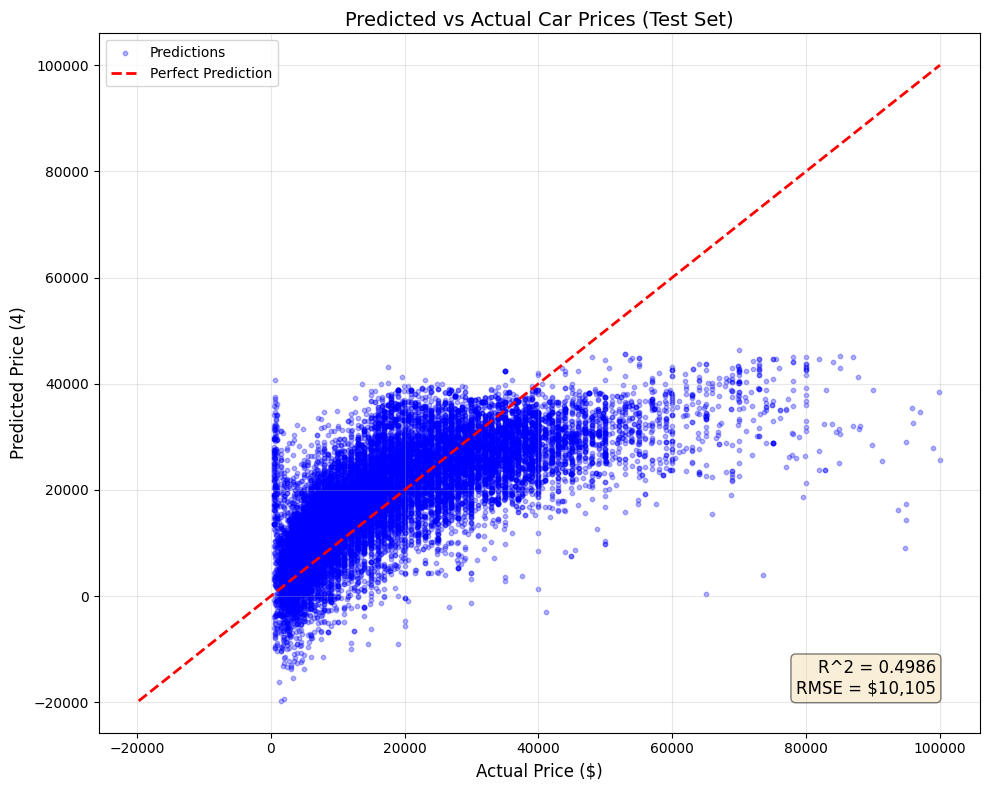

Plot saved to results/predictions_vs_actual.png


In [8]:
# Create figure with specified size
plt.figure(figsize=(10, 8))

# Create scatter plot of actual vs predicted prices
plt.scatter(y_test, y_test_pred, alpha=0.3, s=10, color='blue', label='Predictions')

# Add the perfect prediction line (y = x)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())

# Plot diagonal line with red dashes style
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

# Add axis labels with units for clarity
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price (4)', fontsize=12)

# Add title for what the plot shows
plt.title('Predicted vs Actual Car Prices (Test Set)', fontsize=14)

# Add legend to explain the elements
plt.legend(loc='upper left', fontsize=10)

# Add grid for easier eading of values
plt.grid(True, alpha=0.3)

# Add R^2 and RMSE annotation in bottom-right corner
plt.annotate(f'R^2 = {test_r2:.4f}\nRMSE = ${test_rmse:,.0f}',
             xy=(0.95, 0.05), xycoords='axes fraction',
             fontsize=12, verticalalignment='bottom',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Create results directory if it doesn't exist
# exist_ok=True prevents error if directory already exists
results_dir = 'results'
os.makedirs(results_dir, exist_ok=True)

# Save Figure as PNG with high resolution
plt.savefig(os.path.join(results_dir, 'predictions_vs_actual.png'), dpi=150)

# Display the plot in the notebook
plt.show()

print(f"Plot saved to {results_dir}/predictions_vs_actual.png")

# Visualization 2: Residual Plot

- Residuals = Actual values - Predicted values (the prediction errors)
- A good model has residuals randomly scattered around zero
- Patterns in residuals indicate problems (curved pattern = non-linear model)

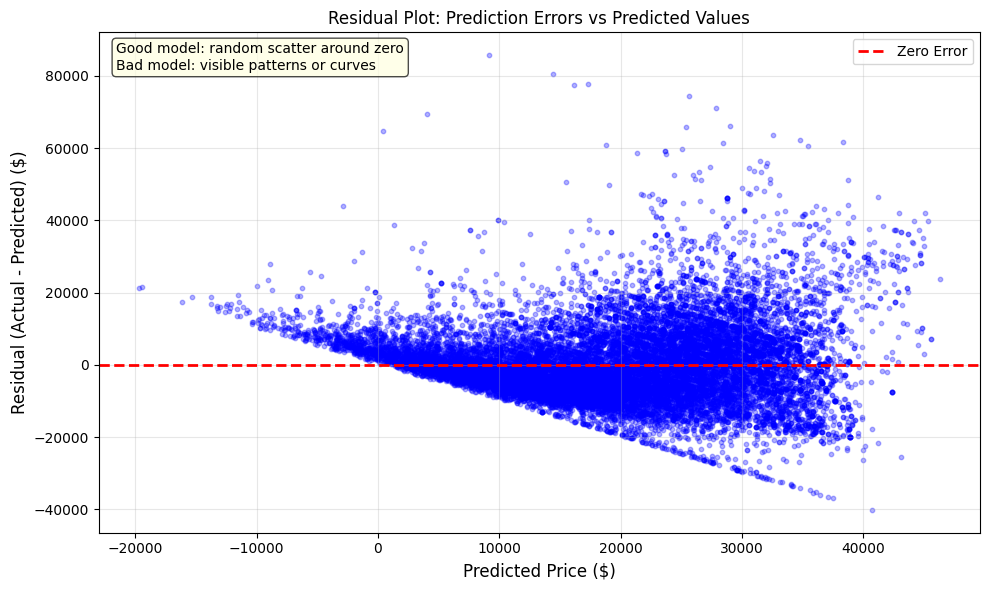

Residual plot saved to results/residual_plot.png


In [11]:
# Calculate residuals (prediction errors)
residuals = y_test - y_test_pred

# Create figure
plt.figure(figsize=(10, 6))

# Create scatter plot of predicted values vs residuals
# x-axis: what the model predicted
# y-axis: how far off the prediction was
plt.scatter(y_test_pred, residuals, alpha=0.3, s=10, color='blue')

# Add horizontal line at y=0 (perfect predictions have residual of 0)
# This line represents "no error"
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')

# Add axis labels
plt.xlabel('Predicted Price ($)', fontsize=12)
plt.ylabel('Residual (Actual - Predicted) ($)', fontsize=12)

# Add title
plt.title('Residual Plot: Prediction Errors vs Predicted Values', fontsize=12)

# Add legend
plt.legend(loc='upper right', fontsize=10)

# Add grid for readability
plt.grid(True, alpha=0.3)

# Add annotation explaining what the look for
plt.annotate('Good model: random scatter around zero\nBad model: visible patterns or curves',
             xy=(0.02, 0.98), xycoords='axes fraction',
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig(os.path.join(results_dir, 'residual_plot.png'), dpi=150)

# Display
plt.show()

print(f"Residual plot saved to {results_dir}/residual_plot.png")

# Visualization 3: Feature Importance (Learned Weights)

- Bar chart showing the magnitude of each feature's weight
- Larger absolute values = stronger influence on predicted price
- Positive weights increase price, negative weights decrease price

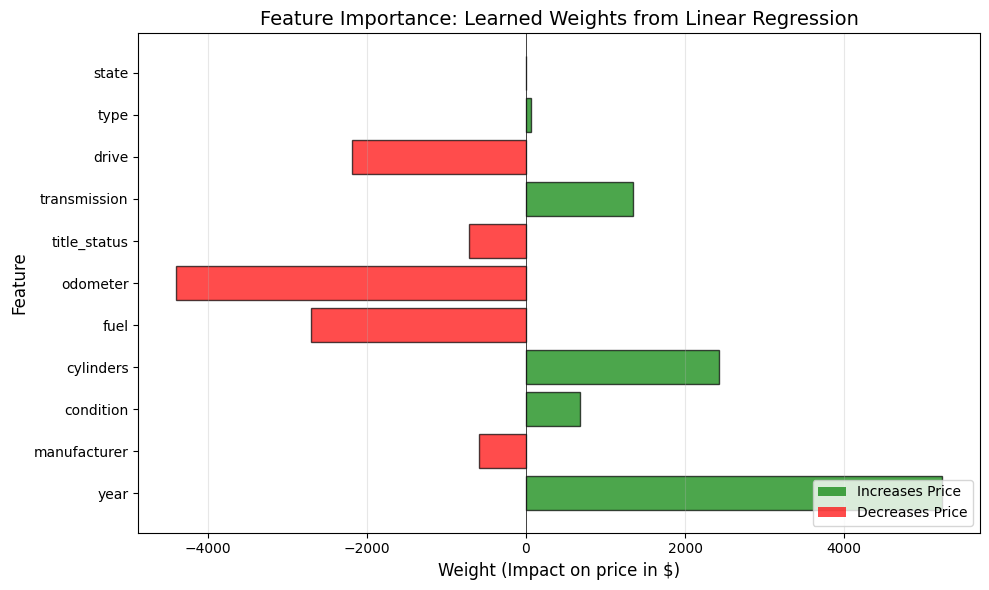

Feature importance plot saved to results/feature_importance.png


In [12]:
# Get the learned weights (coefficients) from the model
weights = model.coef_

# Create figure
plt.figure(figsize=(10, 6))

# Define colors based on weight sign
# Green for positive weights (increases price)
# Red for negative weights (decrease price)
colors = ['green' if w > 0 else 'red' for w in weights]

# Create horizontal bar chart
# Using horizontal bars because feature names are easier to read
bars = plt.barh(FEATURE_NAMES, weights, color=colors, edgecolor='black', alpha=0.7)

# Add vertical line at x=0 to show divide between positive/negative
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Add axis labels
plt.xlabel('Weight (Impact on price in $)', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add title
plt.title('Feature Importance: Learned Weights from Linear Regression', fontsize=14)

# Add legend explaining colors
# Create custom legend handles
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', alpha=0.7, label='Increases Price'),
                   Patch(facecolor='red', alpha=0.7, label='Decreases Price')]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10)

# Add grid for readability
plt.grid(True, alpha=0.3, axis='x')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Save figure
plt.savefig(os.path.join(results_dir, 'feature_importance.png'), dpi=150)

# Display
plt.show()

print(f"Feature importance plot saved to {results_dir}/feature_importance.png")